In [1]:
import os
from os.path import expanduser
import csv
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats.stats import pearsonr

from harrison_functions.file_tools.zip import read_gzipped_tsv

pd.options.display.max_columns = 50
pd.options.display.max_rows = 50

project_name = os.getcwd().split('/')[-1]
data_dir = 'data'  # expanduser(f'~/data/{project_name}')

In [2]:
to_save=False

# Get Data

In [3]:
expression_df = pd.read_csv(f'{data_dir}/downloads/GSE41265_allGenesTPM.txt.gz',
                                    index_col=0, sep='\t', compression='gzip')

print(expression_df.shape)
expression_df.head()

(27723, 21)


,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,P1,P2,P3
GENE,,,,,,,,,,,,,,,,,,,,,
XKR4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019906,0.000000
AB338584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
B3GAT2,0.000000,0.000000,0.023441,0.000000,0.000000,0.029378,0.000000,0.055452,0.000000,0.029448,0.024137,0.000000,0.000000,0.031654,0.000000,0.000000,0.000000,42.150208,0.680327,0.022996,0.110236
NPL,72.008590,0.000000,128.062012,0.095082,0.000000,0.000000,112.310234,104.329122,0.119230,0.000000,0.000000,0.000000,0.116802,0.104200,0.106188,0.229197,0.110582,0.000000,7.109356,6.727028,14.525447
T2,0.109249,0.172009,0.000000,0.000000,0.182703,0.076012,0.078698,0.000000,0.093698,0.076583,0.000000,0.693459,0.010137,0.081936,0.000000,0.000000,0.086879,0.068174,0.062063,0.000000,0.050605


In [4]:
# Alt method:
# shalek2013_metadata = pd.read_csv('data/downloads/GSE41265_series_matrix.txt.gz',
#                                   sep='\t', skiprows=32).set_index('!Sample_title')

file = read_gzipped_tsv('data/downloads/GSE41265_series_matrix.txt.gz')
shalek2013_metadata = pd.DataFrame(file[33:], columns=file[32]).set_index('Sample_title')
shalek2013_metadata

,Single cell S1,Single cell S2,Single cell S3,Single cell S4,Single cell S5,Single cell S6,Single cell S7,Single cell S8,Single cell S9,Single cell S10,Single cell S11,Single cell S12,Single cell S13,Single cell S14,Single cell S15,Single cell S16,Single cell S17,Single cell S18,"10,000 cell population P1","10,000 cell population P2","10,000 cell population P3",Molecular barcode single cell MB1,Molecular barcode single cell MB2,Molecular barcode single cell MB3
Sample_title,,,,,,,,,,,,,,,,,,,,,,,,
Sample_geo_accession,GSM1012777,GSM1012778,GSM1012779,GSM1012780,GSM1012781,GSM1012782,GSM1012783,GSM1012784,GSM1012785,GSM1012786,GSM1012787,GSM1012788,GSM1012789,GSM1012790,GSM1012791,GSM1012792,GSM1012793,GSM1012794,GSM1012795,GSM1012796,GSM1012797,GSM1110889,GSM1110890,GSM1110891
Sample_status,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013
Sample_submission_date,Oct 01 2012,Oct 01 2012,Oct 01 2012,Oct 01 2012,Oct 01 2012,Oct 01 2012,Oct 01 2012,Oct 01 2012,Oct 01 2012,Oct 01 2012,Oct 01 2012,Oct 01 2012,Oct 01 2012,Oct 01 2012,Oct 01 2012,Oct 01 2012,Oct 01 2012,Oct 01 2012,Oct 01 2012,Oct 01 2012,Oct 01 2012,Mar 29 2013,Mar 29 2013,Mar 29 2013
Sample_last_update_date,May 15 2019,May 15 2019,May 15 2019,May 15 2019,May 15 2019,May 15 2019,May 15 2019,May 15 2019,May 15 2019,May 15 2019,May 15 2019,May 15 2019,May 15 2019,May 15 2019,May 15 2019,May 15 2019,May 15 2019,May 15 2019,May 15 2019,May 15 2019,May 15 2019,May 15 2019,May 15 2019,May 15 2019
Sample_type,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA
Sample_channel_count,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Sample_source_name_ch1,BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim)
Sample_organism_ch1,Mus musculus,Mus musculus,Mus musculus,Mus musculus,Mus musculus,Mus musculus,Mus musculus,Mus musculus,Mus musculus,Mus musculus,Mus musculus,Mus musculus,Mus musculus,Mus musculus,Mus musculus,Mus musculus,Mus musculus,Mus musculus,Mus musculus,Mus musculus,Mus musculus,Mus musculus,Mus musculus,Mus musculus
Sample_characteristics_ch1,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6


In [5]:
shalek2013_metadata = shalek2013_metadata.T

# EDA

<AxesSubplot:>

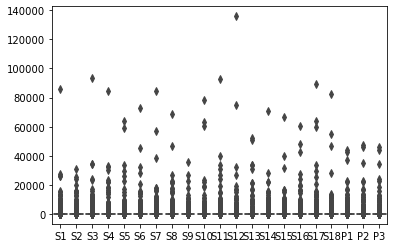

In [6]:
sns.boxplot(data=expression_df)

<AxesSubplot:>

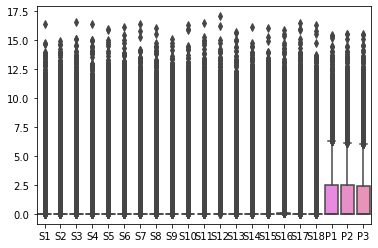

In [7]:
sns.boxplot(data=expression_df.apply(lambda x: np.log2(x+1)))

array([[1.        , 0.61549555],
       [0.61549555, 1.        ]])

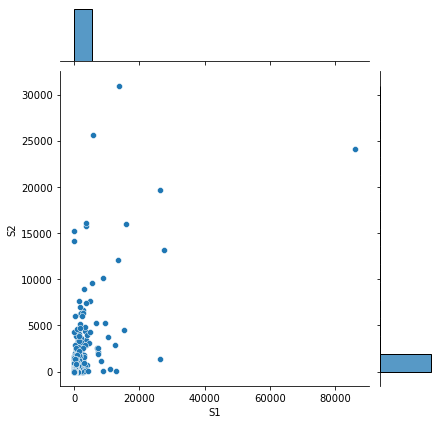

In [8]:
sns.jointplot(x=expression_df['S1'],
              y=expression_df['S2'])

np.corrcoef(x=expression_df['S1'],
            y=expression_df['S2'])

array([[1.        , 0.63548663],
       [0.63548663, 1.        ]])

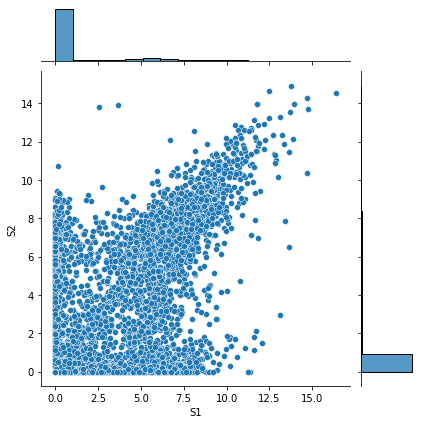

In [9]:
sns.jointplot(x=expression_df['S1'].apply(lambda x: np.log2(x+1)),
              y=expression_df['S2'].apply(lambda x: np.log2(x+1)))

np.corrcoef(x=expression_df['S1'].apply(lambda x: np.log2(x+1)),
            y=expression_df['S2'].apply(lambda x: np.log2(x+1)))

# Filter

Aim for about 5000 genes of interst to get a good distribution

In [10]:
genes_of_interest = (expression_df > 2**3-1).sum(axis=1) >= 5

array([[1.        , 0.46934567],
       [0.46934567, 1.        ]])

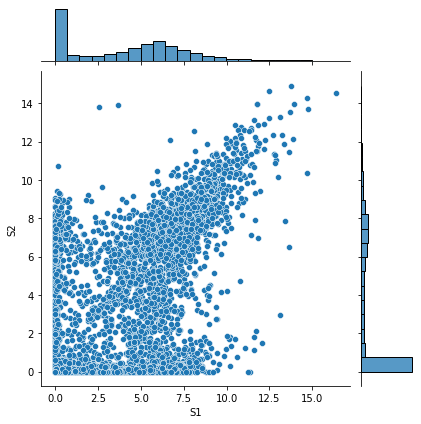

In [11]:
sns.jointplot(x=expression_df[(genes_of_interest)]['S1'].apply(lambda x: np.log2(x+1)),
              y=expression_df[(genes_of_interest)]['S2'].apply(lambda x: np.log2(x+1)))

np.corrcoef(x=expression_df[(genes_of_interest)]['S1'].apply(lambda x: np.log2(x+1)),
            y=expression_df[(genes_of_interest)]['S2'].apply(lambda x: np.log2(x+1)))